In [172]:
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

In [173]:
import pandas as pd

oil_price_df = pd.read_csv('./BP-CRUDE_OIL_PRICES.csv')
oil_price_df['Date'] = pd.to_datetime(oil_price_df['Date'],  format='%Y-%m-%d')

In [174]:
import datetime
start_date = '1969-12-31'
end_date = '2021-12-31'
oil_price_df = oil_price_df.loc[(oil_price_df['Date'] > start_date)&(oil_price_df['Date'] < end_date)]
oil_price_df.head()

,Date,Price in Contemporary Dollars,Price in 2020 Dollars
0,2020-12-31,41.838346,41.838346
1,2019-12-31,64.210573,65.002729
2,2018-12-31,71.310060,73.497863
3,2017-12-31,54.192440,57.219320
4,2016-12-31,43.734170,47.160642


In [175]:
oil_price_df = oil_price_df.sort_values(by='Date')

In [176]:
oil_price_df.head()

,Date,Price in Contemporary Dollars,Price in 2020 Dollars
50,1970-12-31,1.80,11.991231
49,1971-12-31,2.24,14.296306
48,1972-12-31,2.48,15.346664
47,1973-12-31,3.29,19.166999
46,1974-12-31,11.58,60.809767


In [177]:
cols = ['Price in 2020 Dollars']
oil_price_df[cols] = oil_price_df[cols].apply(normalize)
oil_price_df.head()

,Date,Price in Contemporary Dollars,Price in 2020 Dollars
50,1970-12-31,1.80,0.000000
49,1971-12-31,2.24,0.019868
48,1972-12-31,2.48,0.028922
47,1973-12-31,3.29,0.061851
46,1974-12-31,11.58,0.420786


In [178]:
sp_500_df = pd.read_csv('./S&P 500 Historical Data.csv')
sp_500_df = sp_500_df[['Date', 'Price']]
sp_500_df.head()

,Date,Price
0,Nov 21,"4,594.62"
1,Oct 21,"4,605.38"
2,Sep 21,"4,307.54"
3,Aug 21,"4,522.68"
4,Jul 21,"4,395.26"


In [179]:
sp_500_df = sp_500_df[sp_500_df['Date'].str.contains('Dec')]
sp_500_df.head()

,Date,Price
11,Dec 20,"3,756.07"
23,Dec 19,"3,230.78"
35,Dec 18,"2,506.85"
47,Dec 17,"2,673.61"
59,Dec 16,"2,238.83"


In [180]:
calendar = {
    'Jan': '01-31', 
    'Feb': '02-28', 
    'Mar': '03-30', 
    'Apr': '04-30', 
    'May': '05-31', 
    'Jun': '06-30', 
    'Jul': '07-30', 
    'Aug': '08-31', 
    'Sep': '09-30',
    'Oct': '10-31', 
    'Nov': '11-30', 
    'Dec': '12-31'
}

def convertToDate(date_string):
    date_list = date_string.split()
    month = date_list[0]
    year = date_list[1]
    if month in calendar.keys():
        month = calendar[month]
    year_number = int(year[0])
    if year_number in [2, 1, 0]:
        year = '20' + year
    else:
        year = '19' + year
    return year + '-' + month

convertToDate('Feb 20')

'2020-02-28'

In [181]:
sp_500_df['date_new'] = sp_500_df.apply(lambda x: convertToDate(x['Date']),axis=1)
sp_500_df['date_new'] = pd.to_datetime(sp_500_df['date_new'],  format='%Y-%m-%d')
sp_500_df.head()

,Date,Price,date_new
11,Dec 20,"3,756.07",2020-12-31
23,Dec 19,"3,230.78",2019-12-31
35,Dec 18,"2,506.85",2018-12-31
47,Dec 17,"2,673.61",2017-12-31
59,Dec 16,"2,238.83",2016-12-31


In [182]:
sp_500_df = sp_500_df.sort_values(by='date_new')
sp_500_df = sp_500_df.loc[(sp_500_df['date_new'] > start_date)&(sp_500_df['date_new'] < end_date)]

In [183]:
# sp_500_df['Price'] = sp_500_df['Price'].astype(int)
sp_500_df['Price'] = sp_500_df['Price'].str.replace(',', '').astype(float)
sp_500_df.head()

,Date,Price,date_new
611,Dec 70,92.15,1970-12-31
599,Dec 71,102.09,1971-12-31
587,Dec 72,118.05,1972-12-31
575,Dec 73,97.55,1973-12-31
563,Dec 74,68.56,1974-12-31


In [188]:
from sklearn.preprocessing import MinMaxScaler
sp_500_array = sp_500_df['Price'].to_numpy()
sp_500_array = sp_500_array.reshape(-1, 1)

mmscaler = MinMaxScaler()
sp_500_df['Price_scaled'] = mmscaler.fit_transform(sp_500_array)
sp_500_df.head()

,Date,Price,date_new,Price_scaled
611,Dec 70,92.15,1970-12-31,0.006397
599,Dec 71,102.09,1971-12-31,0.009093
587,Dec 72,118.05,1972-12-31,0.013421
575,Dec 73,97.55,1973-12-31,0.007862
563,Dec 74,68.56,1974-12-31,0.000000


<AxesSubplot:xlabel='date_new'>

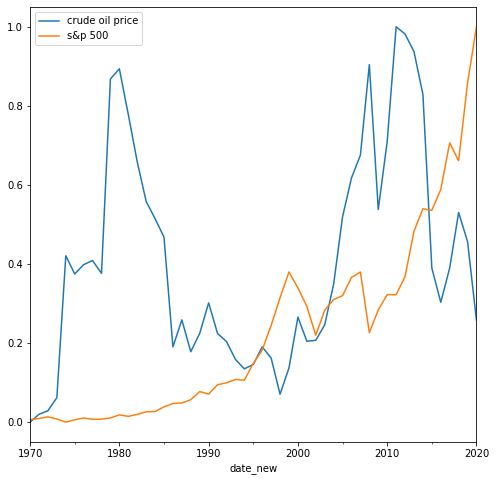

In [189]:
import matplotlib.pyplot as plt 

ax = oil_price_df.plot(x='Date', y='Price in 2020 Dollars', figsize=(8, 8), label='crude oil price')
sp_500_df.plot(ax=ax, x='date_new', y='Price_scaled', label='s&p 500')

In [190]:
cpi_df = pd.read_csv('CPI_CPALTT01USM657N.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'],  format='%Y-%m-%d')
cpi_df = cpi_df.loc[(cpi_df['DATE'] > start_date)&(cpi_df['DATE'] < end_date)]
cpi_df.head()

,DATE,CPALTT01USM657N
120,1970-01-01,0.265252
121,1970-02-01,0.529101
122,1970-03-01,0.526316
123,1970-04-01,0.785340
124,1970-05-01,0.259740


In [191]:
cpi_df_index_array = cpi_df['CPALTT01USM657N'].to_numpy()
cpi_df_index_array = cpi_df_index_array.reshape(-1, 1)

mmscaler = MinMaxScaler()
cpi_df['index_scaled'] = mmscaler.fit_transform(cpi_df_index_array)
cpi_df.head()

,DATE,CPALTT01USM657N,index_scaled
120,1970-01-01,0.265252,0.585985
121,1970-02-01,0.529101,0.656890
122,1970-03-01,0.526316,0.656141
123,1970-04-01,0.785340,0.725750
124,1970-05-01,0.259740,0.584503


In [192]:
ppi_df = pd.read_csv('PPI_ACO.csv')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'],  format='%Y-%m-%d')
ppi_df = ppi_df.loc[(ppi_df['DATE'] > start_date)&(ppi_df['DATE'] < end_date)]
ppi_df.head()

,DATE,PPIACO
684,1970-01-01,36.5
685,1970-02-01,36.7
686,1970-03-01,36.7
687,1970-04-01,36.8
688,1970-05-01,36.8


In [193]:
ppi_df_index_array = ppi_df['PPIACO'].to_numpy()
ppi_df_index_array = ppi_df_index_array.reshape(-1, 1)

mmscaler = MinMaxScaler()
ppi_df['index_scaled'] = mmscaler.fit_transform(ppi_df_index_array)
ppi_df.head()

,DATE,PPIACO,index_scaled
684,1970-01-01,36.5,0.000000
685,1970-02-01,36.7,0.000982
686,1970-03-01,36.7,0.000982
687,1970-04-01,36.8,0.001473
688,1970-05-01,36.8,0.001473


In [194]:
gdp_df = pd.read_csv('GDP.csv')
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'],  format='%Y-%m-%d')
gdp_df = gdp_df.loc[(gdp_df['DATE'] > start_date)&(gdp_df['DATE'] < end_date)]
gdp_df.head()

,DATE,GDP
92,1970-01-01,1051.200
93,1970-04-01,1067.375
94,1970-07-01,1086.059
95,1970-10-01,1088.608
96,1971-01-01,1135.156


In [195]:
gdp_df_index_array = gdp_df['GDP'].to_numpy()
gdp_df_index_array = gdp_df_index_array.reshape(-1, 1)

mmscaler = MinMaxScaler()
gdp_df['index_scaled'] = mmscaler.fit_transform(gdp_df_index_array)
gdp_df.head()

,DATE,GDP,index_scaled
92,1970-01-01,1051.200,0.000000
93,1970-04-01,1067.375,0.000731
94,1970-07-01,1086.059,0.001575
95,1970-10-01,1088.608,0.001690
96,1971-01-01,1135.156,0.003793


In [196]:
fed_rate = pd.read_csv('Rate_FedFundsEffectiveRate.csv')
fed_rate['DATE'] = pd.to_datetime(fed_rate['DATE'],  format='%Y-%m-%d')
fed_rate = fed_rate.loc[(fed_rate['DATE'] > start_date)&(fed_rate['DATE'] < end_date)]
fed_rate.head()

,DATE,FEDFUNDS
186,1970-01-01,8.98
187,1970-02-01,8.98
188,1970-03-01,7.76
189,1970-04-01,8.10
190,1970-05-01,7.95


In [197]:
fed_rate_index_array = fed_rate['FEDFUNDS'].to_numpy()
fed_rate_index_array = fed_rate_index_array.reshape(-1, 1)

mmscaler = MinMaxScaler()
fed_rate['rate_scaled'] = mmscaler.fit_transform(fed_rate_index_array)
fed_rate.head()

,DATE,FEDFUNDS,rate_scaled
186,1970-01-01,8.98,0.468766
187,1970-02-01,8.98,0.468766
188,1970-03-01,7.76,0.404724
189,1970-04-01,8.10,0.422572
190,1970-05-01,7.95,0.414698


In [209]:
fed_rate.tail()

,DATE,FEDFUNDS,rate_scaled
803,2021-06-01,0.08,0.001575
804,2021-07-01,0.10,0.002625
805,2021-08-01,0.09,0.002100
806,2021-09-01,0.08,0.001575
807,2021-10-01,0.08,0.001575


In [268]:
unemployment_df = pd.read_csv('unemployment_rate.csv')
to_month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
umemployment_transformed = []
unemployment_list = unemployment_df.values.tolist()
for year_rate in unemployment_list:
    year = int(year_rate[0])
    row_data = []
    for index, rate in enumerate(year_rate[1:]):
        year_month = str(year) + '-' + to_month[index]+ '-' +'01'
        row_data_temp = [year_month, rate]
        row_data.append(row_data_temp)
    umemployment_transformed.extend(row_data)

unemployment_df_new = pd.DataFrame(umemployment_transformed, columns=['DATE', 'rate'])
unemployment_df_new.dropna(inplace=True)

unemployment_df_new_array = unemployment_df_new['rate'].to_numpy()
unemployment_df_new_array = unemployment_df_new_array.reshape(-1, 1)
unemployment_df_new['rate_scaled'] = mmscaler.fit_transform(unemployment_df_new_array)

unemployment_df_new['DATE'] = pd.to_datetime(unemployment_df_new['DATE'],  format='%Y-%m-%d')

In [269]:
unemployment_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 621
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         622 non-null    datetime64[ns]
 1   rate         622 non-null    float64       
 2   rate_scaled  622 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 19.4 KB


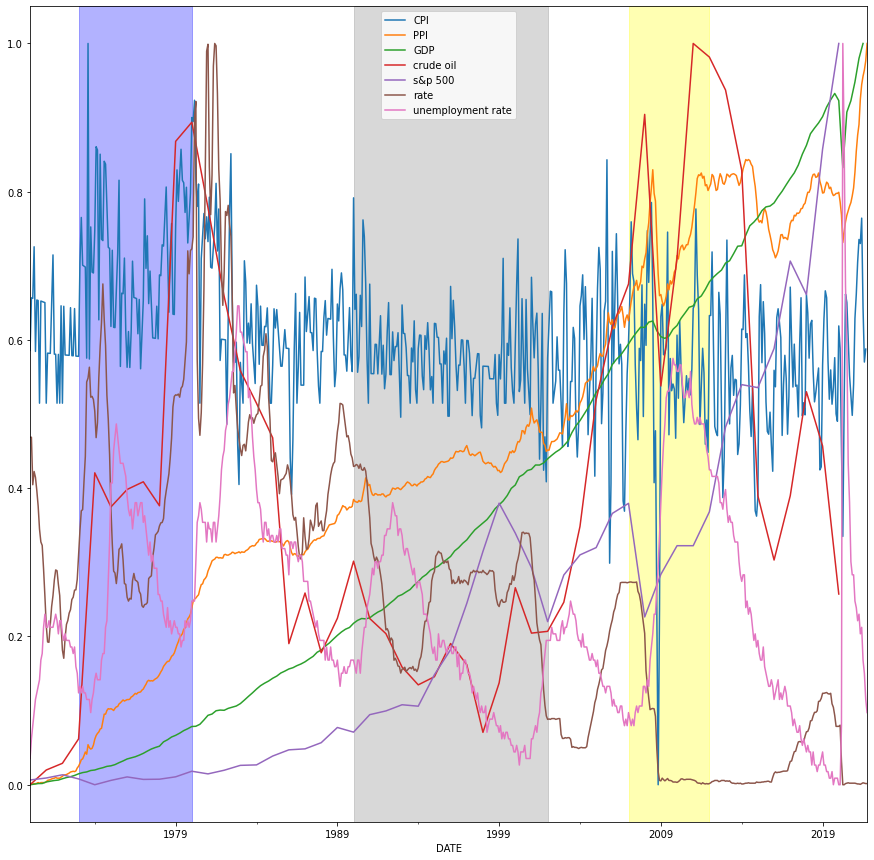

In [270]:
import matplotlib.pyplot as plt
ax = cpi_df.plot(x='DATE', y='index_scaled', figsize=(15, 15), label='CPI')
ppi_df.plot(ax=ax, x='DATE', y='index_scaled', label='PPI')
gdp_df.plot(ax=ax, x='DATE', y='index_scaled', label='GDP')
oil_price_df.plot(ax=ax, x='Date', y='Price in 2020 Dollars', label='crude oil')
sp_500_df.plot(ax=ax, x='date_new', y='Price_scaled', label='s&p 500')
fed_rate.plot(ax=ax, x='DATE', y='rate_scaled', label='rate')
unemployment_df_new.plot(ax=ax, x='DATE', y='rate_scaled', label='unemployment rate')

ax.axvspan(datetime.datetime(1973,1,1), datetime.datetime(1980,1,1), color="blue", alpha=0.3)
ax.axvspan(datetime.datetime(1990,1,1), datetime.datetime(2002,1,1), color="grey", alpha=0.3)
ax.axvspan(datetime.datetime(2007,1,1), datetime.datetime(2012,1,1), color="yellow", alpha=0.3)

In [272]:
seventies_start = '1973-01-01'
seventies_end = '1979-01-01'

cpi_df_seventies = cpi_df.loc[(cpi_df['DATE'] > seventies_start)&(cpi_df['DATE'] < seventies_end)]
ppi_df_seventies = ppi_df.loc[(ppi_df['DATE'] > seventies_start)&(ppi_df['DATE'] < seventies_end)]
gdp_df_seventies = gdp_df.loc[(gdp_df['DATE'] > seventies_start)&(gdp_df['DATE'] < seventies_end)]
fed_rate_seventies = fed_rate.loc[(fed_rate['DATE'] > seventies_start)&(fed_rate['DATE'] < seventies_end)]
oil_price_seventies = oil_price_df.loc[(oil_price_df['Date'] > seventies_start)&(oil_price_df['Date'] < seventies_end)]
sp_500_df_seventies = sp_500_df.loc[(sp_500_df['date_new'] > seventies_start)&(sp_500_df['date_new'] < seventies_end)]
unemployment_df_seventies = unemployment_df_new.loc[(unemployment_df_new['DATE'] > seventies_start)&(unemployment_df_new['DATE'] < seventies_end)]

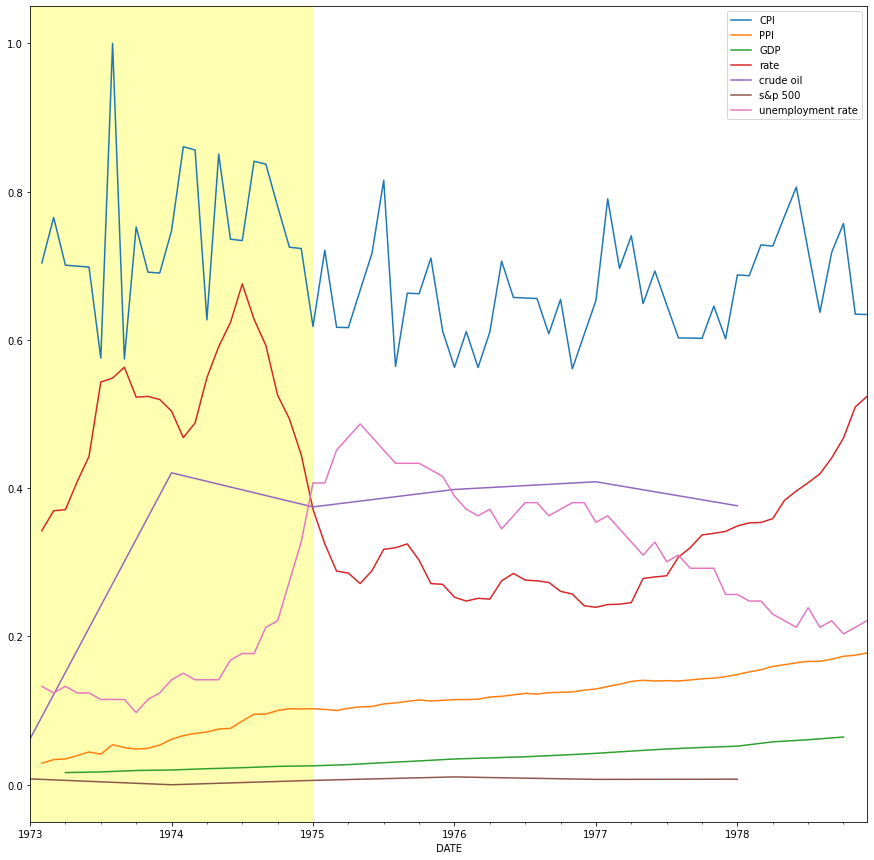

In [274]:
ax = cpi_df_seventies.plot(x='DATE', y='index_scaled', figsize=(15, 15), label='CPI')
ppi_df_seventies.plot(ax=ax, x='DATE', y='index_scaled', label='PPI')
gdp_df_seventies.plot(ax=ax, x='DATE', y='index_scaled', label='GDP')
fed_rate_seventies.plot(ax=ax, x='DATE', y='rate_scaled', label='rate')
oil_price_seventies.plot(ax=ax, x='Date', y='Price in 2020 Dollars', label='crude oil')
sp_500_df_seventies.plot(ax=ax, x='date_new', y='Price_scaled', label='s&p 500')
unemployment_df_seventies.plot(ax=ax, x='DATE', y='rate_scaled', label='unemployment rate')

ax.axvspan(datetime.datetime(1973,1,1), datetime.datetime(1975,1,1), color="yellow", alpha=0.3)

In [275]:
ninties_start = '1990-01-01'
ninties_end = '2002-01-01'

cpi_df_ninties = cpi_df.loc[(cpi_df['DATE'] > ninties_start)&(cpi_df['DATE'] < ninties_end)]
ppi_df_ninties = ppi_df.loc[(ppi_df['DATE'] > ninties_start)&(ppi_df['DATE'] < ninties_end)]
gdp_df_ninties = gdp_df.loc[(gdp_df['DATE'] > ninties_start)&(gdp_df['DATE'] < ninties_end)]
fed_rate_ninties = fed_rate.loc[(fed_rate['DATE'] > ninties_start)&(fed_rate['DATE'] < ninties_end)]
oil_price_ninties = oil_price_df.loc[(oil_price_df['Date'] > ninties_start)&(oil_price_df['Date'] < ninties_end)]
sp_500_df_ninties = sp_500_df.loc[(sp_500_df['date_new'] > ninties_start)&(sp_500_df['date_new'] < ninties_end)]
unemployment_df_seventies = unemployment_df_new.loc[(unemployment_df_new['DATE'] > ninties_start)&(unemployment_df_new['DATE'] < ninties_end)]

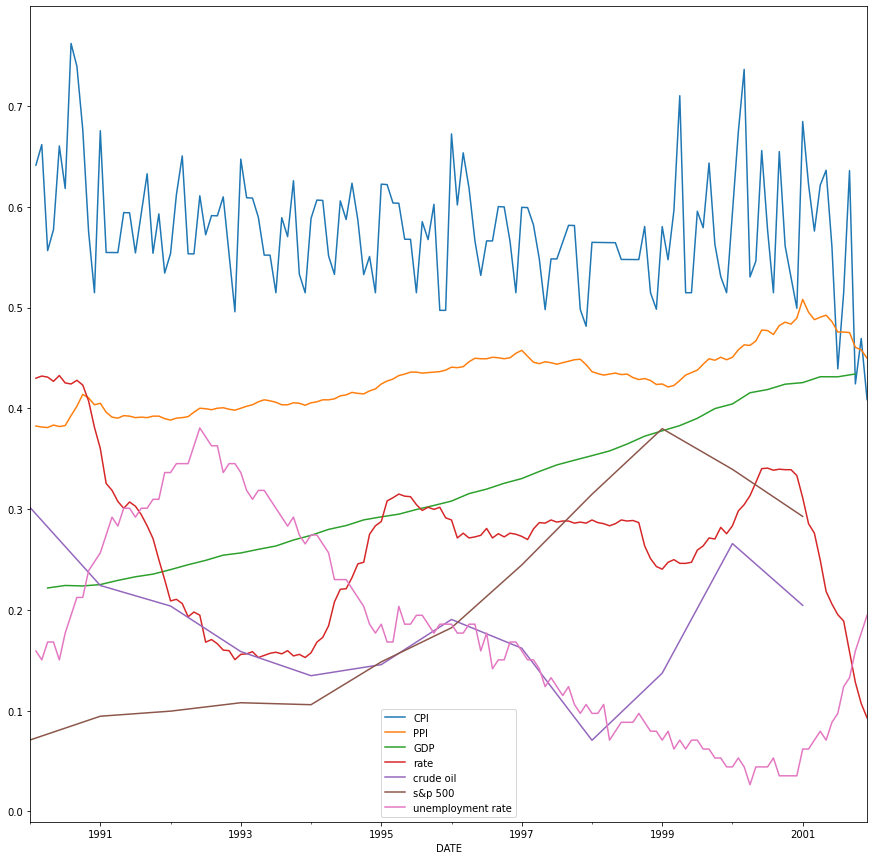

In [277]:
ax = cpi_df_ninties.plot(x='DATE', y='index_scaled', figsize=(15, 15), label='CPI')
ppi_df_ninties.plot(ax=ax, x='DATE', y='index_scaled', label='PPI')
gdp_df_ninties.plot(ax=ax, x='DATE', y='index_scaled', label='GDP')
fed_rate_ninties.plot(ax=ax, x='DATE', y='rate_scaled', label='rate')
oil_price_ninties.plot(ax=ax, x='Date', y='Price in 2020 Dollars', label='crude oil')
sp_500_df_ninties.plot(ax=ax, x='date_new', y='Price_scaled', label='s&p 500')
unemployment_df_seventies.plot(ax=ax, x='DATE', y='rate_scaled', label='unemployment rate')


In [280]:
millennium_start = '2000-01-01'
millennium_end = '2012-01-01'

cpi_df_millennium = cpi_df.loc[(cpi_df['DATE'] > millennium_start)&(cpi_df['DATE'] < millennium_end)]
ppi_df_millennium = ppi_df.loc[(ppi_df['DATE'] > millennium_start)&(ppi_df['DATE'] < millennium_end)]
gdp_df_millennium = gdp_df.loc[(gdp_df['DATE'] > millennium_start)&(gdp_df['DATE'] < millennium_end)]
fed_rate_millennium = fed_rate.loc[(fed_rate['DATE'] > millennium_start)&(fed_rate['DATE'] < millennium_end)]
oil_price_millennium = oil_price_df.loc[(oil_price_df['Date'] > millennium_start)&(oil_price_df['Date'] < millennium_end)]
sp_500_df_millennium = sp_500_df.loc[(sp_500_df['date_new'] > millennium_start)&(sp_500_df['date_new'] < millennium_end)]
unemployment_df_seventies = unemployment_df_new.loc[(unemployment_df_new['DATE'] > millennium_start)&(unemployment_df_new['DATE'] < millennium_end)]

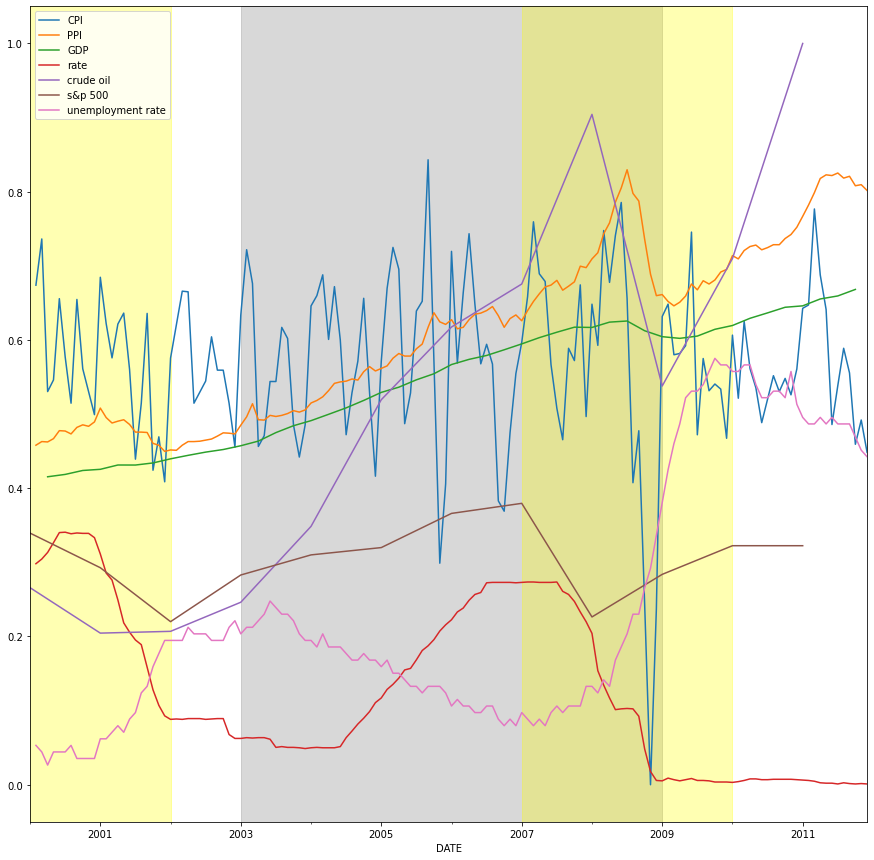

In [281]:
ax = cpi_df_millennium.plot(x='DATE', y='index_scaled', figsize=(15, 15), label='CPI')
ppi_df_millennium.plot(ax=ax, x='DATE', y='index_scaled', label='PPI')
gdp_df_millennium.plot(ax=ax, x='DATE', y='index_scaled', label='GDP')
fed_rate_millennium.plot(ax=ax, x='DATE', y='rate_scaled', label='rate')
oil_price_millennium.plot(ax=ax, x='Date', y='Price in 2020 Dollars', label='crude oil')
sp_500_df_millennium.plot(ax=ax, x='date_new', y='Price_scaled', label='s&p 500')
unemployment_df_seventies.plot(ax=ax, x='DATE', y='rate_scaled', label='unemployment rate')

ax.axvspan(datetime.datetime(2000,1,1), datetime.datetime(2002,1,1), color="yellow", alpha=0.3) # dot come bubble
ax.axvspan(datetime.datetime(2003,1,1), datetime.datetime(2009,1,1), color="grey", alpha=0.3) # energy crisis oil price bubble
ax.axvspan(datetime.datetime(2007,1,1), datetime.datetime(2010,1,1), color="yellow", alpha=0.3)# subprime mortgage